## Files to Databases

Logan Gall, gall0487

Attributions/Assistance:
Laure Briol,
Gregory Kohler,
ESRI Arcpy documentation,
ChatGPT,
LucidChart

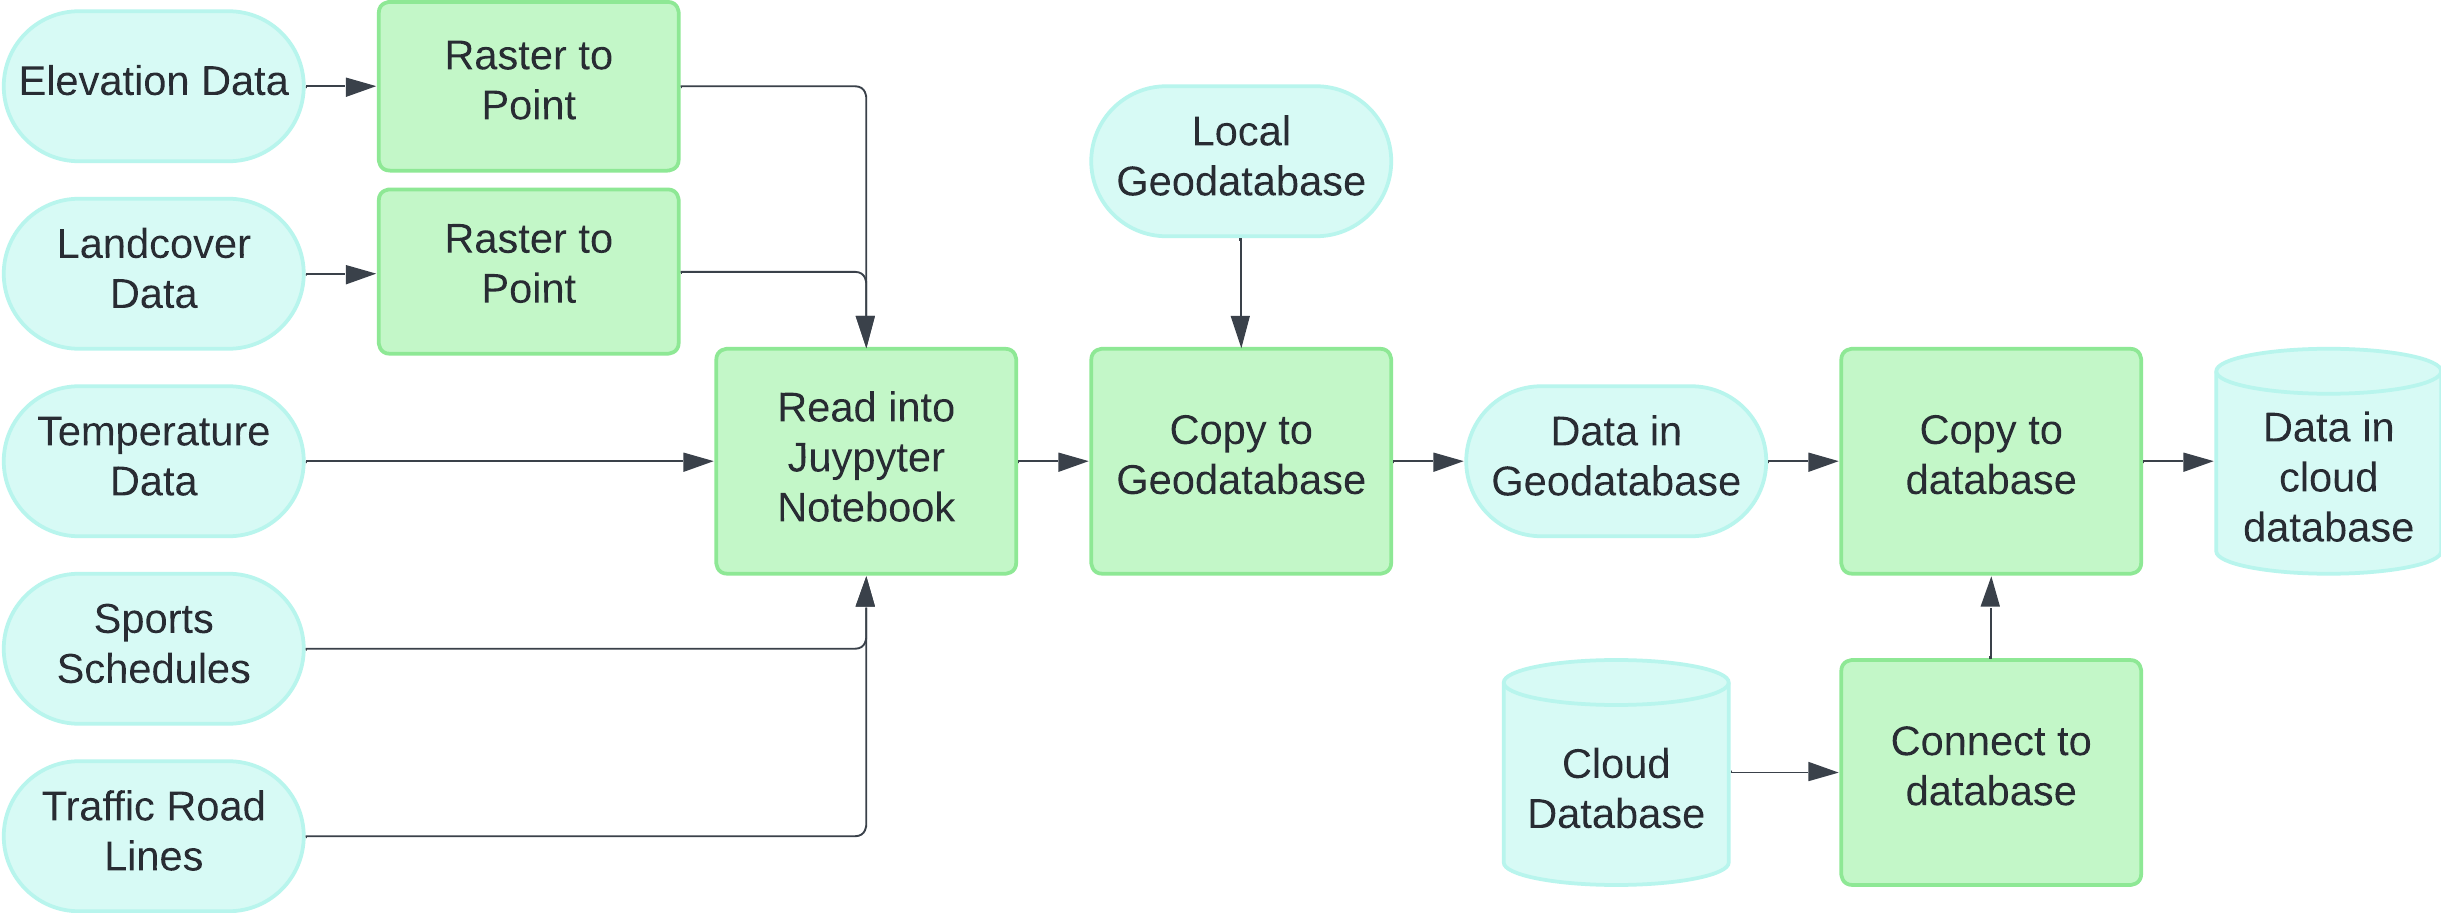

In [2]:
import arcpy
import os
#location to current directory
file_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
os.chdir(file_path)
#absolute Path for geodatabase
arcpy.env.workspace = file_path

In [3]:
#Aggregating all our data to one .gdb

#Create GDB
# Define the name of the geodatabase
geodatabase_name = "ArcLabII.gdb"

# Combine the directory and geodatabase name to form the path
geodatabase_path = os.path.join(file_path, geodatabase_name)

# Create the file geodatabase
#arcpy.CreateFileGDB_management(file_path, geodatabase_name)

print(f"Geodatabase created at: {geodatabase_path}")

#Elevation Data
data_name = 'digital_elevation_model_30m'
data_loc = r'.\MN_Geo_Data\elev_30m_digital_elevation_model.gdb'

#Copy raster to local geodatabase
arcpy.management.CopyRaster(data_loc + '\\' + data_name, geodatabase_path + '\\' + data_name)

#Landcover
data_name = 'NLCD_2019_Land_Cover'
data_loc = r'.\MN_Geo_Data'

#Copy raster to local geodatabase
arcpy.management.CopyRaster(data_loc + '\\' + data_name + '.tif', geodatabase_path + '\\' + data_name)

#Temperature Data
data_name = 'TMIN_TMAX.csv'
data_loc = r''

#Move table to local geodatabase
arcpy.conversion.TableToGeodatabase(Input_Table=data_loc + '\\' + data_name, Output_Geodatabase=geodatabase_path)

#Sporting Events
data_name = 'qaqc_schedule.csv'
data_loc = r''

#Move table to local geodatabase
arcpy.conversion.TableToGeodatabase(Input_Table=data_loc + '\\' + data_name, Output_Geodatabase=geodatabase_path)

#Road Networks
data_name = 'traffic_lines'
data_loc = r''

#Copy shape to local geodatabase
arcpy.management.CopyFeatures(in_features=data_loc + '\\' + data_name + '.shp', out_feature_class=geodatabase_path + '\\' + data_name)

data_name = 'no_traffic_lines'
data_loc = r''

#Copy shape to local geodatabase
arcpy.management.CopyFeatures(in_features=data_loc + '\\' + data_name + '.shp', out_feature_class=geodatabase_path + '\\' + data_name)

Geodatabase created at: C:\Users\Logan\Documents\ArcGIS\Projects\MyProject3\ArcLabII.gdb


<Result 'C:\\Users\\Logan\\Documents\\ArcGIS\\Projects\\MyProject3\\ArcLabII.gdb\\no_traffic_lines'>

In [4]:
# Set up Database Connection within Arc
# Parameters for the database connection
out_folder = r'./database_connection'  # Folder where the .sde file will be stored
out_nam = "postgres_connection.sde"  # Name of the .sde file to create

# Database connection properties
server = "35.188.97.184"  # Name or IP of the PostgreSQL server
service = "5432"  # PostgreSQL port (default is 5432)
database = "gis5572"  # Name of the database
username = "postgres"
password = "Passwordd"

# Use DATABASE_AUTH when connecting to PostgreSQL/PostGIS
authentication_type = "DATABASE_AUTH"

#Version of data
version = "sde.DEFAULT"

In [5]:
#Create database connection file
arcpy.management.CreateDatabaseConnection(
    out_folder_path=out_folder,
    out_name=out_nam,
    database_platform="POSTGRESQL",
    instance=server,
    account_authentication="DATABASE_AUTH",
    username=username,
    password=password,
    save_user_pass="SAVE_USERNAME",
    database="gis5572",
    schema="",
    version_type="TRANSACTIONAL",
    version="",
    date=None,
    auth_type="",
    project_id="",
    default_dataset="",
    refresh_token='',
    key_file=None,
    role="",
    warehouse="",
    advanced_options=""
)

<Result 'C:\\Users\\Logan\\Documents\\ArcGIS\\Projects\\MyProject3\\database_connection\\postgres_connection.sde'>

In [6]:
#local geodatabase
local_gdb = "ArcLabII.gdb"

#Combine the directory and geodatabase name to form the path
local_gdb_path = os.path.join(file_path, geodatabase_name)

#Define the name of the remote geodatabase
geodatabase_name = "postgres_connection.sde"

#Combine the directory and geodatabase name to form the path
geodatabase_path = os.path.join(file_path, geodatabase_name)

In [7]:
#Temperature Data
data_name = 'TMIN_TMAX.csv'
data_loc = r''

#Push data to remote database
arcpy.conversion.TableToGeodatabase(Input_Table=data_loc + '\\' + data_name, Output_Geodatabase=geodatabase_path)
print(data_loc + '\\' + data_name + ' pushed to database')

#Sporting Events
data_name = 'qaqc_schedule.csv'
data_loc = r''

#Push data to remote database
arcpy.conversion.TableToGeodatabase(Input_Table=data_loc + '\\' + data_name, Output_Geodatabase=geodatabase_path)
print(data_loc + '\\' + data_name + 'pushed to database')

#Road Networks
data_name = 'traffic_lines'
data_loc = r''

#Push data to remote database
arcpy.conversion.FeatureClassToGeodatabase(Input_Features=data_loc + '\\' + data_name + '.shp', Output_Geodatabase=geodatabase_path)
print(data_loc + '\\' + data_name + '.shp' + 'pushed to database')

data_name = 'no_traffic_lines'
data_loc = r''

#Push data to remote database
arcpy.conversion.FeatureClassToGeodatabase(Input_Features=data_loc + '\\' + data_name + '.shp', Output_Geodatabase=geodatabase_path)
print(data_loc + '\\' + data_name + '.shp' + 'pushed to database')

\TMIN_TMAX.csv pushed to database
\qaqc_schedule.csvpushed to database
\traffic_lines.shppushed to database
\no_traffic_lines.shppushed to database


In [14]:
#Landcover
data_name = 'NLCD_2019_Land_Cover'
data_loc = r'.\MN_Geo_Data'

out_data = 'NLCD_Resampled'

arcpy.management.Resample(in_raster = data_loc + '\\' + data_name + '.tif',
                         out_raster = local_gdb_path + '\\' + out_data,
                         cell_size = "9000 9000",
                         resampling_type = "MAJORITY")

print('resample done')

#Convert raster to point data (shape)
arcpy.conversion.RasterToPoint(
    in_raster=local_gdb_path + '\\' + out_data,
    out_point_features=local_gdb_path + '\\' + out_data + '_point',
    raster_field="Value"
)

print(data_loc + '\\' + data_name + ' converted to point')

resample done
.\MN_Geo_Data\NLCD_2019_Land_Cover converted to point


In [11]:
#Push data to remote database
arcpy.conversion.FeatureClassToGeodatabase(local_gdb_path + '\\' + out_data + '_point', geodatabase_path)
print(local_gdb_path + '\\' + data_name + '_point' + 'pushed to database')

C:\Users\Logan\Documents\ArcGIS\Projects\MyProject3\ArcLabII.gdb\NLCD_2019_Land_Cover_pointpushed to database


In [15]:
#Landcover
data_name = 'digital_elevation_model_30m'
data_loc = r'.\MN_Geo_Data\elev_30m_digital_elevation_model.gdb'

out_data = 'DEM_Resampled'

arcpy.management.Resample(in_raster = data_loc + '\\' + data_name,
                         out_raster = local_gdb_path + '\\' + out_data,
                         cell_size = "9000 9000",
                         resampling_type = "MAJORITY")

print('resample done')

#Convert raster to point data (shape)
arcpy.conversion.RasterToPoint(
    in_raster=local_gdb_path + '\\' + out_data,
    out_point_features=local_gdb_path + '\\' + out_data + '_point',
    raster_field="Value"
)

print(data_loc + '\\' + data_name + ' converted to point')

resample done
.\MN_Geo_Data\elev_30m_digital_elevation_model.gdb\digital_elevation_model_30m converted to point


In [16]:
#Push data to remote database
arcpy.conversion.FeatureClassToGeodatabase(local_gdb_path + '\\' + out_data + '_point', geodatabase_path)
print(local_gdb_path + '\\' + data_name + '_point' + 'pushed to database')

C:\Users\Logan\Documents\ArcGIS\Projects\MyProject3\ArcLabII.gdb\digital_elevation_model_30m_pointpushed to database
